In [15]:
%matplotlib inline
import numpy as np
import pylab

import os, glob
from dateutil import parser
from datetime import datetime
from matplotlib.dates import date2num
from flock.plot import density
from pysurvey.plot import setup, dateticks, hist, embiggen, minmax, legend, icolorbar

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
hostname = !hostname
assert hostname[0] == 'chargino', 'This is a computer specific notebook'

In [18]:
names = []
dates = []
for filename in glob.glob('/Users/ajmendez/Pictures/wakeup/*.jpg'):
    stats = os.stat(filename)
    names.append(os.path.basename(filename))
    dates.append(datetime.fromtimestamp(int(stats.st_mtime)))
ndates = date2num(dates)

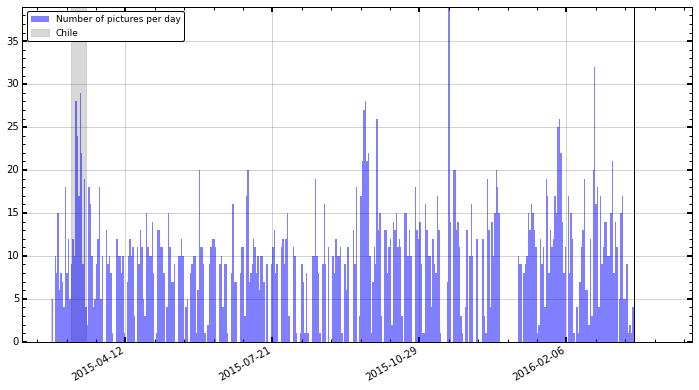

In [19]:
setup(figsize=(12,6), xr=embiggen(minmax(ndates),[0.05,0.1]))
pylab.hist(ndates, np.arange(*minmax(ndates)), lw=0, alpha=0.5,
     label='Number of pictures per day')
pylab.axvline(date2num(datetime.now()), color='k')
pylab.axvspan(*date2num([datetime(2015,3,6), 
                        datetime(2015,3,16)]), 
              label='Chile', 
              color='0.7', alpha=0.5, zorder=-1)
dateticks('%Y-%m-%d')
legend(loc=2)

In [20]:
print dates[0].weekday() #monday == 0
print np.floor(ndates[0]%7)

4
5.0


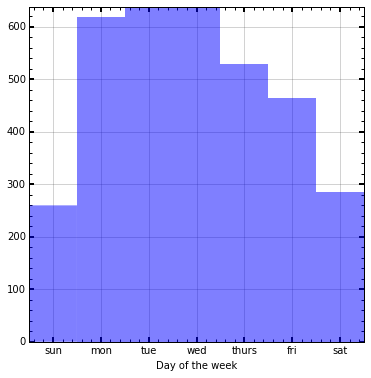

In [22]:
days = (ndates%7)
setup(figsize=(6,6), 
      xr=[0,7], xlabel='Day of the week',
      xtickv=np.arange(0,8)+0.5,
      xticknames='sun mon tue wed thurs fri sat'.split())
_ = pylab.hist(days, np.arange(0,8), lw=0, alpha=0.5)

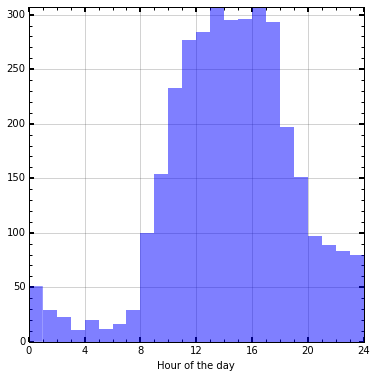

In [23]:
hours = (ndates%1)*24.0
setup(figsize=(6,6), 
      xr=[0,24], xlabel='Hour of the day',
      xtickv=np.arange(0,25,4))
_ = pylab.hist(hours, np.arange(0,25), lw=0, alpha=0.5)

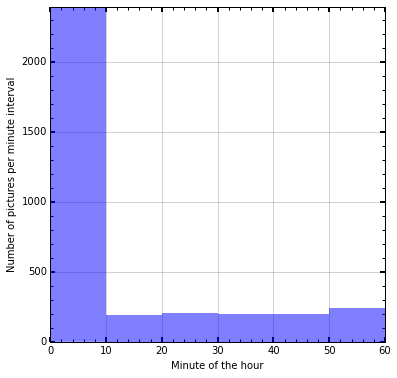

In [24]:
minutes = (hours%1)*60
setup(figsize=(6,6), 
      xr=[0,60], xlabel='Minute of the hour',
      xtickv=np.arange(0,61,10),
      ylabel='Number of pictures per minute interval')
_ = pylab.hist(minutes, np.arange(0,61,10), lw=0, alpha=0.5)

/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


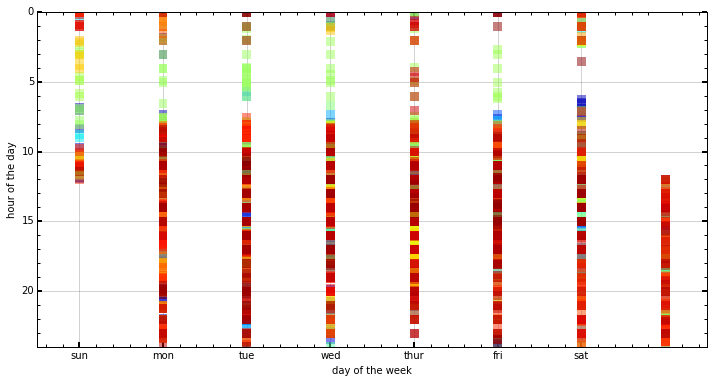

In [25]:
setup(figsize=(12,6),
      xr=[-0.5,7.5], xlabel='day of the week',
      xtickv=np.arange(0,7), xticknames='sun mon tue wed thur fri sat'.split(),
      yr=[24,0], ylabel='hour of the day')
pylab.scatter(np.round(days), hours, c=ndates, 
              marker='s', s=80, alpha=0.5, edgecolor='none')

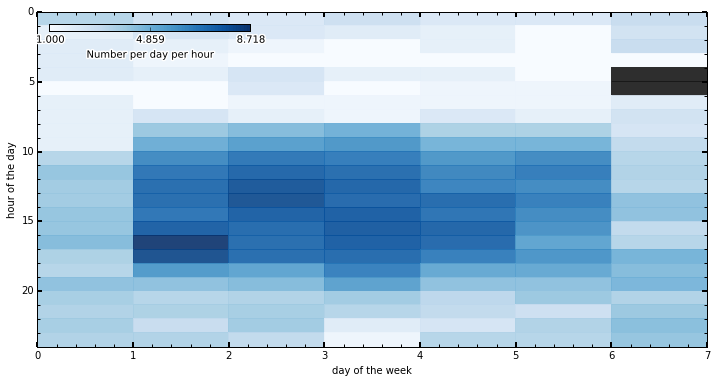

In [26]:
def density_week(ndates):
    days = (ndates%7)
    hours = (ndates%1)*24.0
    
    cmap = pylab.cm.Blues
    cmap.set_bad('0.09')
    
    setup(figsize=(12,6),
          xr=[0,7], xlabel='day of the week', 
          yr=[24,0], ylabel='hour of the day')
    dn = density(days,hours, extent=[0,7, 0,24], nbins=[7,24], mesh=True, zorder=-10,
                 cmap=cmap, alpha=0.9, label='Number per day per hour',
                 maskzeros=True,
#                  hidezeros=True, maskzeros=True
                 sqrt=True, colorbar=False)
    icolorbar(dn)

density_week(ndates)

    